In [2]:
# load libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

# load inflow dataset into dataframe
inflow_data = pd.read_csv("data/inflow_imputed_W1.csv")

# change index of inflow dataframe to time step
inflow_data = inflow_data.set_index('Date-time CET-CEST (DD/MM/YYYY HH:mm)')

# change index format to datetime
#inflow_data.index = pd.to_datetime(inflow_data.index, format="%d/%m/%Y %H:%M")
inflow_data.index = pd.to_datetime(inflow_data.index)

# make list with dma names
dma_list = list(inflow_data.columns.values)

# male list with dma description
dma_descripton = ["Hospital district",
                   "Residential district in the countryside",
                   "Residential district in the countryside",
                   "Suburban residential/commercial district",
                   "Residential/commercial district close to the city centre",
                   "Suburban district including sport facilities and office buildings",
                   "Residential district close to the city centre",
                   "City centre district",
                   "Commercial/industrial district close to the port",
                   "Commercial/industrial district close to the port"]

# make list with information of users supplied
users_supplied = [162,531,607,2094,7955,1135,3180,2901,425,776]

# make list with average net inflow
av_net_inflo = [8.4,9.6,4.3,32.9,78.3,8.1,25.1,20.8,20.6,26.4]

# # print first two rows
# inflow_data.head(3)

In [12]:
inflow_data.keys()

Index(['DMA A (L/s)', 'DMA B (L/s)', 'DMA C (L/s)', 'DMA D (L/s)',
       'DMA E (L/s)', 'DMA F (L/s)', 'DMA G (L/s)', 'DMA H (L/s)',
       'DMA I (L/s)', 'DMA J (L/s)'],
      dtype='object')

In [13]:
map_sarimax_results = {'DMA A (L/s)': 'DMA A',
                       'DMA B (L/s)': 'DMA B',
                       'DMA C (L/s)': 'DMA C',
                       'DMA D (L/s)': 'DMA D',
                       'DMA E (L/s)': 'DMA E',
                       'DMA F (L/s)': 'DMA F',
                       'DMA G (L/s)': 'DMA G',
                       'DMA H (L/s)': 'DMA H',
                       'DMA I (L/s)': 'DMA I',
                       'DMA J (L/s)': 'DMA J'}

map_iai_results = {'DMA A (L/s)': 'dma_a',
                       'DMA B (L/s)': 'dma_b',
                       'DMA C (L/s)': 'dma_c',
                       'DMA D (L/s)': 'dma_d',
                       'DMA E (L/s)': 'dma_e',
                       'DMA F (L/s)': 'dma_f',
                       'DMA G (L/s)': 'dma_g',
                       'DMA H (L/s)': 'dma_h',
                       'DMA I (L/s)': 'dma_i',
                       'DMA J (L/s)': 'dma_j'}

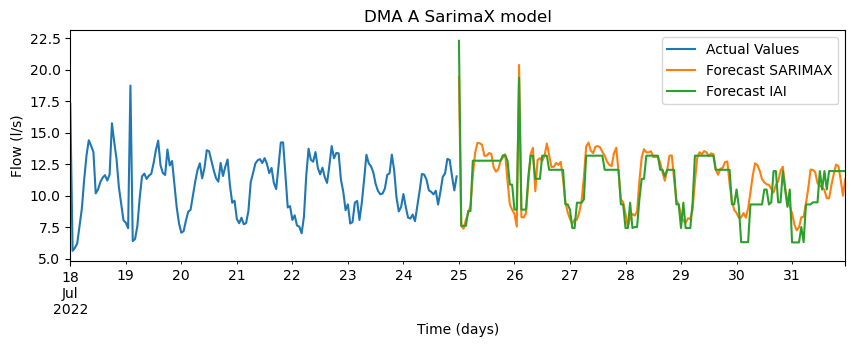

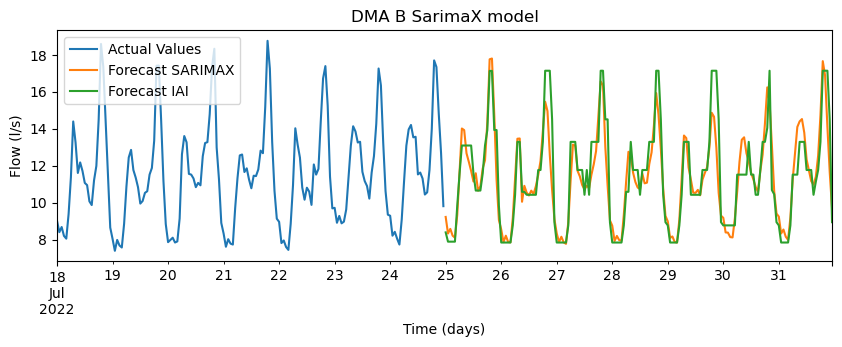

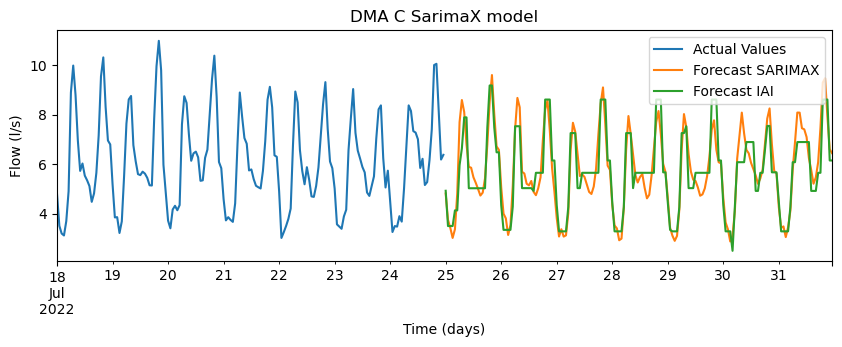

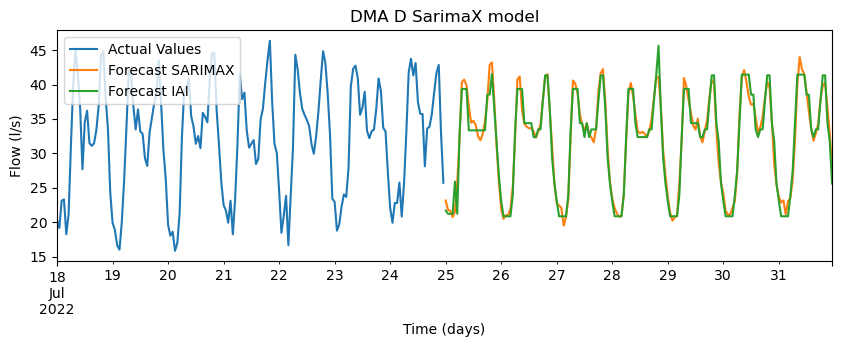

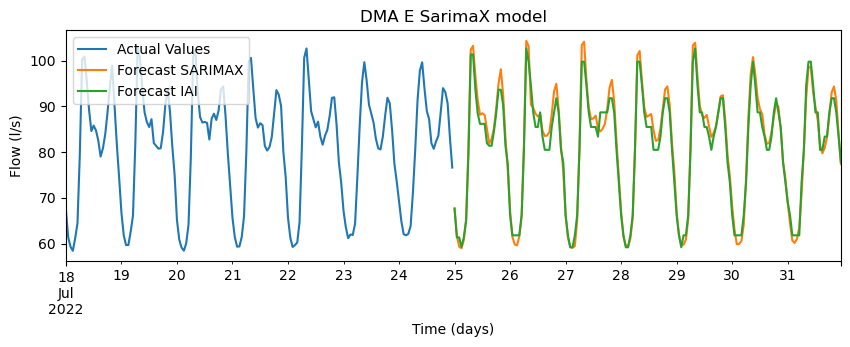

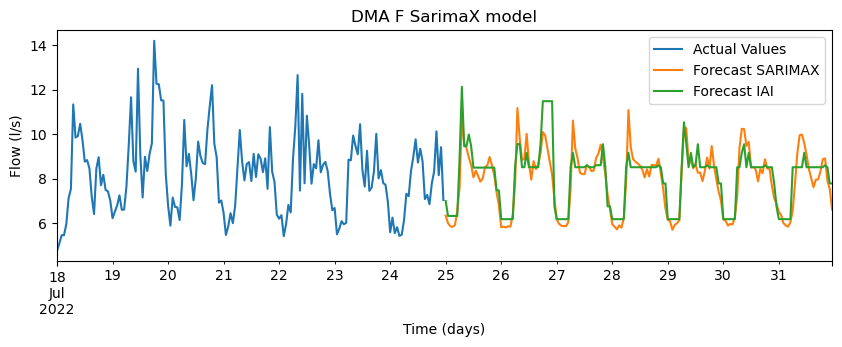

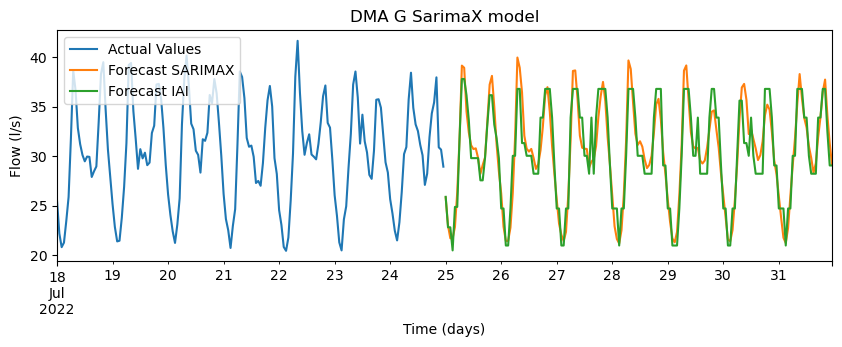

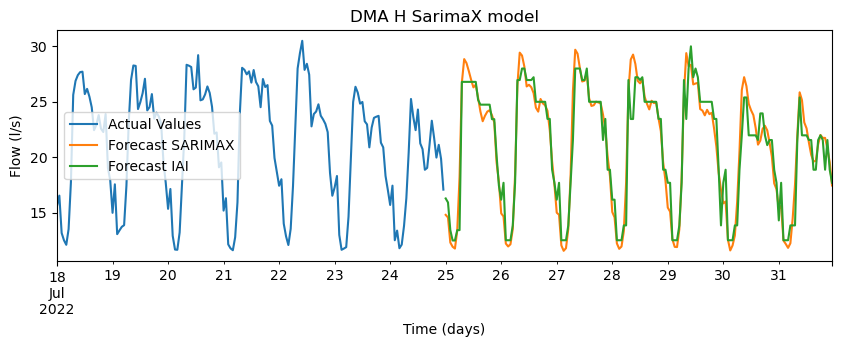

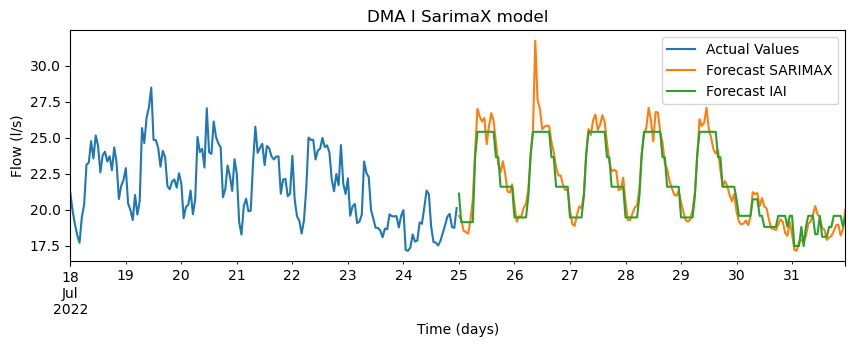

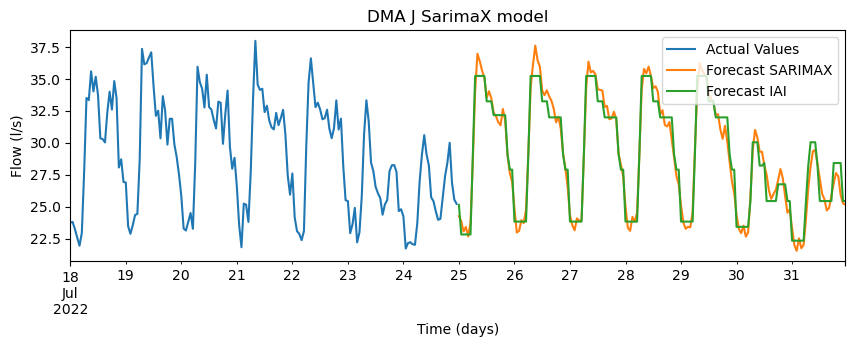

In [14]:
for dma in list(inflow_data.keys()):
    # import sarimax results
    y_pred_SARIMAX = pd.read_csv("W1_battle_results/results_26_weeks/"+map_sarimax_results[dma]+".csv")
    # change index of inflow dataframe to time step
    y_pred_SARIMAX = y_pred_SARIMAX.set_index('time')

    # change index format to datetime
    #inflow_data.index = pd.to_datetime(inflow_data.index, format="%d/%m/%Y %H:%M")
    y_pred_SARIMAX.index = pd.to_datetime(y_pred_SARIMAX.index)

    # import results IAI
    y_pred_IAI = pd.read_csv("IAI_results/"+map_iai_results[dma]+".csv")
    # add time index to results
    y_pred_IAI['time'] = y_pred_SARIMAX.index
    y_pred_IAI = y_pred_IAI.set_index('time')

    # select dma from dataframe
    tseries_df = inflow_data.sort_index()[dma].copy()

    # plot forecast and last two weeks of time series
    fig, ax = plt.subplots(figsize = (10,3))
    tseries_df['2022-07-18':'2022-07-31'].plot(title = dma[:5]+' SarimaX model', ax = ax)
    y_pred_SARIMAX.plot(y='mean',ax = ax)
    y_pred_IAI.plot(y='y_predict',ax = ax)
    ax.set_xlabel('Time (days)')
    ax.set_ylabel('Flow (l/s)')
    ax.legend(['Actual Values','Forecast SARIMAX','Forecast IAI'])
    plt.show()